In [85]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

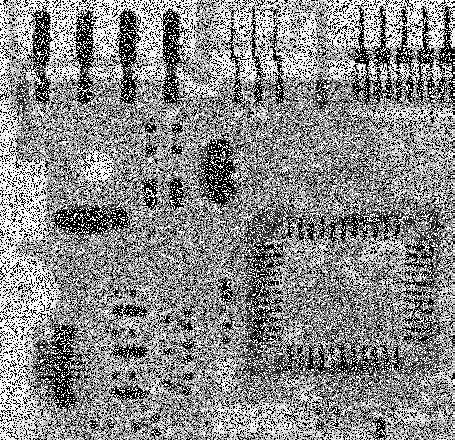

In [86]:
image = cv2.imread('abcl.jpg')
image2 = cv2.imread('fig.jpg')
cv2_imshow(image2)

In [87]:
image.shape

(500, 500, 3)

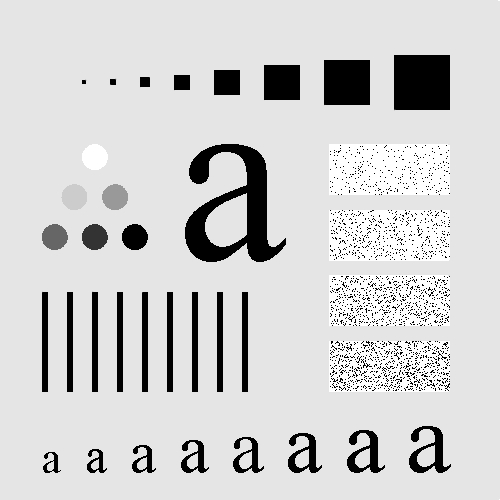

In [88]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

In [89]:
image.shape

(500, 500)

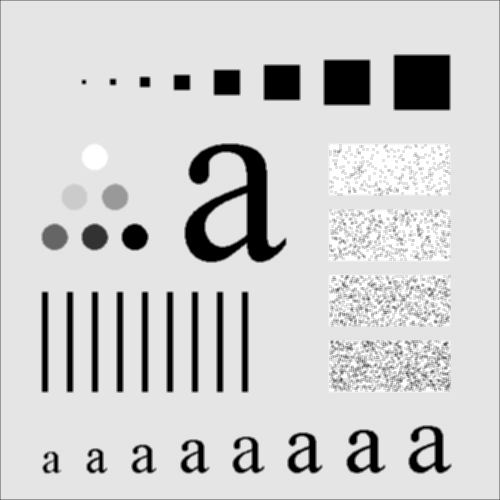

In [90]:
kernel = np.ones((3, 3)) / (3 ** 2)
padded_image = np.pad(image, pad_width=3//2)
filtered_image = np.zeros_like(image)
m = image.shape[0]
n = image.shape[1]

for i in range(m):
  for j in range(n):
    region = padded_image[i:i+3, j:j+3]
    filtered_image[i, j] = np.sum(region * kernel)

mean = np.array(filtered_image, dtype=np.uint8)
cv2_imshow(mean)

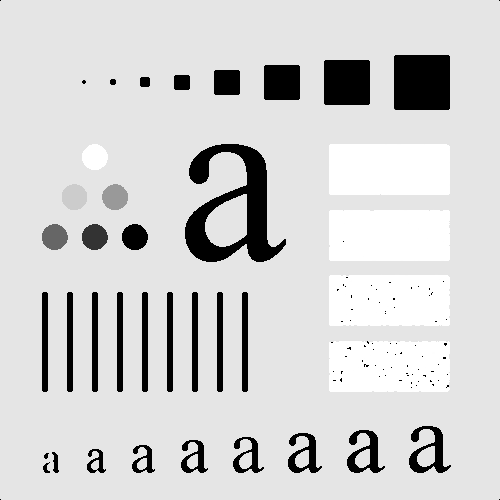

In [91]:

padded_image = np.pad(image, pad_width=3//2, mode="constant")
filtered_image = np.zeros_like(image)
m = image.shape[0]
n = image.shape[1]

for i in range(m):
  for j in range(n):
    region = padded_image[i:i+3, j:j+3]
    filtered_image[i, j] = np.median(region)

median = np.array(filtered_image, dtype=np.uint8)
cv2_imshow(median)

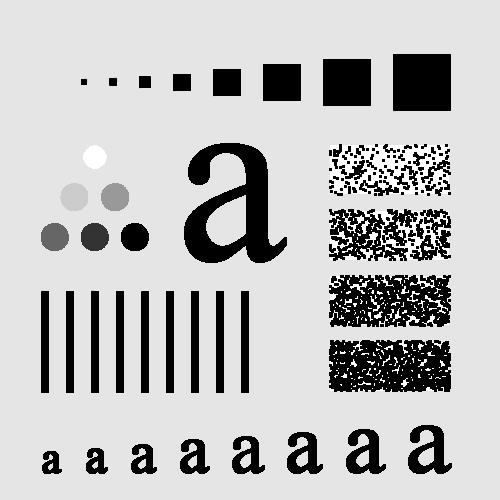

In [92]:

padded_image = np.pad(image, pad_width=3//2, mode='edge')
filtered_image = np.zeros_like(image)
m = image.shape[0]
n = image.shape[1]

for i in range(m):
  for j in range(n):
    region = padded_image[i:i+3, j:j+3]
    filtered_image[i, j] = np.min(region)

min = np.array(filtered_image, dtype=np.uint8)
cv2_imshow(min)

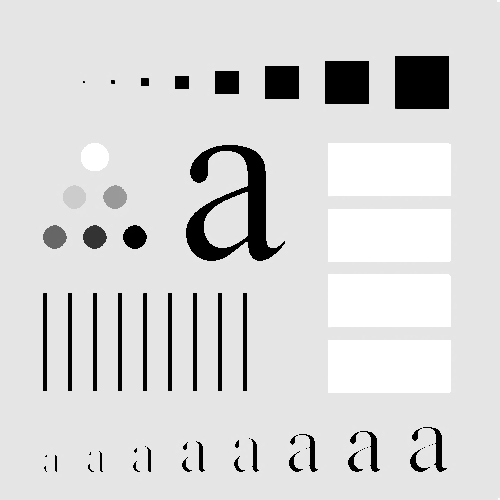

In [93]:
padded_image = np.pad(image, pad_width=3//2, mode='edge')
filtered_image = np.zeros_like(image)
m = image.shape[0]
n = image.shape[1]

for i in range(m):
  for j in range(n):
    region = padded_image[i:i+3, j:j+3]
    filtered_image[i, j] = np.max(region)

max = np.array(filtered_image, dtype=np.uint8)
cv2_imshow(max)

In [99]:
def apply_filter(img, kernel):
    ksize = kernel.shape[0]
    padded = np.pad(image, pad_width=3//2, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            output[i, j] = np.sum(region * kernel)

    return output

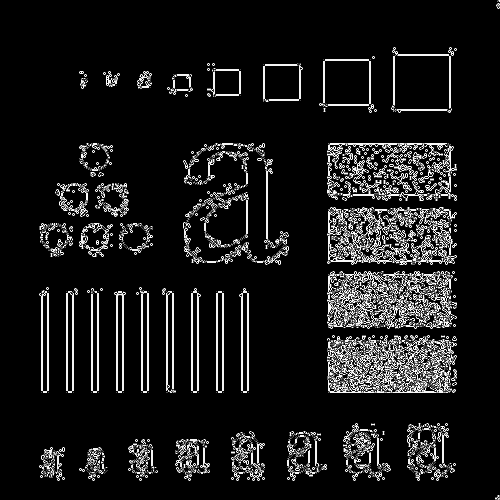

In [101]:
Kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Ky = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
Gx = apply_filter(image, Kx)
Gy = apply_filter(image, Ky)

sobel = np.sqrt(Gx**2 + Gy**2) * 255
sobel = np.array(sobel, dtype=np.uint8)
cv2_imshow(sobel)


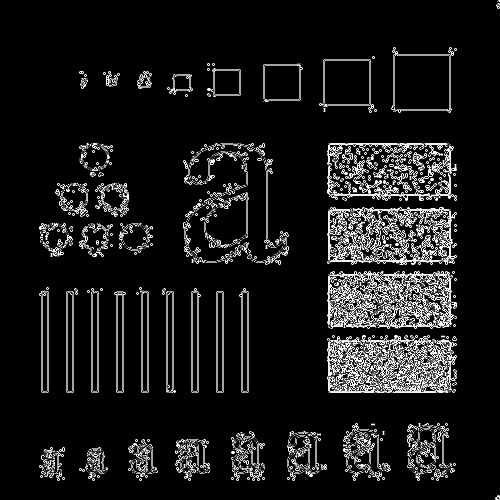

In [102]:
Kx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=np.float32)
Ky = np.array([[-1,-1,-1],[0,0,0],[1,1,1]], dtype=np.float32)
Gx = apply_filter(image, Kx)
Gy = apply_filter(image, Ky)

prewitt = np.sqrt(Gx**2 + Gy**2) * 255
prewitt = np.array(prewitt, dtype=np.uint8)
cv2_imshow(prewitt)

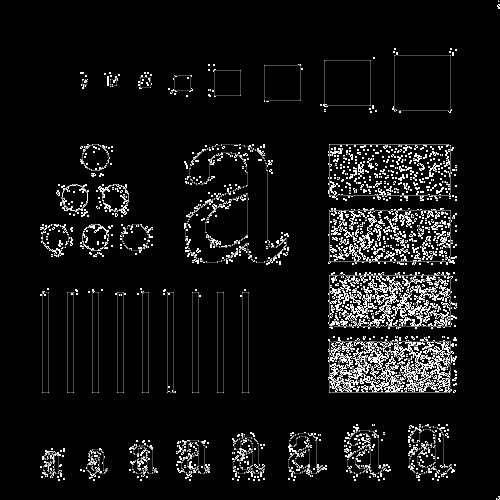

In [106]:
Kx = np.array([[1, 0],[0, -1]], dtype=np.float32)
Ky = np.array([[0, 1],[-1, 0]], dtype=np.float32)
Gx = apply_filter(image, Kx)
Gy = apply_filter(image, Ky)

roberts = np.sqrt(Gx**2 + Gy**2) * 255
roberts = np.array(roberts, dtype=np.uint8)
cv2_imshow(roberts)

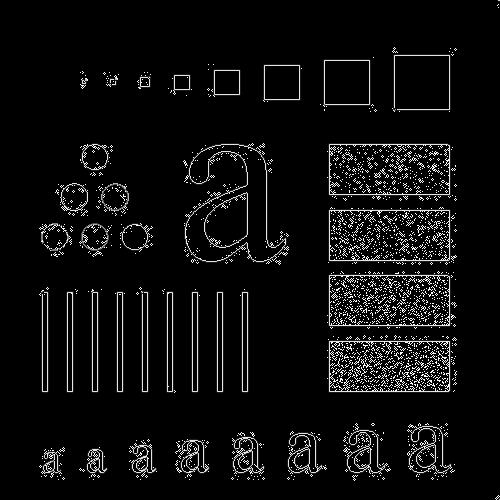

In [104]:
K = np.array([[0,1,0],[1,-4,1],[0,1,0]], dtype=np.float32)

laplacian = apply_filter(image, K)
laplacian = np.array(laplacian, dtype=np.uint8)
cv2_imshow(laplacian)